In [4]:
import os
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import csv
from IPython.display import Image, display

In [56]:
path_blood = os.path.join('images', 'blood', 'data_red_only.csv')
path_good = os.path.join('images', 'good', 'data_good_red_only.csv')
# path_blood_images = os.path.join('images', 'blood', 'data_names_of_images.csv')

df_blood = pd.read_csv(path_blood)
df_blood['label'] = 1
df_good = pd.read_csv(path_good)
df_good['label'] = 0
# df_blood_images = pd.read_csv(path_blood_images)

df_data = pd.concat([df_blood, df_good], ignore_index=True)
df_features = df_data.loc[:, df_data.columns != 'label']


0.4444444444444444
0.4444444444444444
0.4444444444444444
0.4444444444444444
0.5
0.5
0.4444444444444444
0.3333333333333333
0.5555555555555556
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.5
0.3888888888888889
0.3333333333333333
0.2777777777777778
0.3888888888888889
0.3888888888888889
0.3888888888888889
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.3333333333333333
0.2777777777777778
0.5555555555555556
0.5555555555555556
0.5555555555555556
0.5555555555555556
0.5555555555555556
0.5555555555555556
0.5555555555555556
0.5555555555555556
0.5555555555555556
0.5555555555555556
0.6111111111111112
0.7777777777777778
0.6666666666666666
0.7222222222222222


In [46]:
len(df_data[df_data['label'] == 0])

28

In [51]:
X_train, X_test, y_train, y_test = train_test_split(df_features.values, \
                                                    df_data['label'].values, test_size=0.33, random_state=42)
                                                    
# print(X_train)


In [25]:
pca = PCA(n_components=2)
components = pca.fit_transform(X_train)
plt.scatter(components[:, 0], components[:, 1], c = y_train)
plt.xlabel('PCA 0')
plt.ylabel('PCA 1')
# plt.legend()
plt.colorbar()
plt.show()
pca_train = pca.transform(X_train)
pca_test = pca.transform(X_test)

ValueError: n_components=2 must be between 0 and min(n_samples, n_features)=1 with svd_solver='full'

In [48]:
clf = KNeighborsClassifier(n_neighbors=3).fit(pca_train, y_train)
y_hat = clf.predict(pca_test)
clf.score(pca_test, y_test)

NameError: name 'pca_train' is not defined

In [59]:
''' 
When not using PCA
'''
count = 1
for i in range(1, 47):
    df_features = df_data.loc[:,df_data.columns[0:i]]
    X_train, X_test, y_train, y_test = train_test_split(df_features.values, \
                                                    df_data['label'].values, test_size=0.33,random_state=42)
    clf = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
    y_hat = clf.predict(X_test)
    print(clf.score(X_test, y_test))
    count+=1
print(count)

0.4444444444444444
0.4444444444444444
0.4444444444444444
0.4444444444444444
0.5
0.5
0.4444444444444444
0.3333333333333333
0.5555555555555556
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.5
0.3888888888888889
0.3333333333333333
0.2777777777777778
0.3888888888888889
0.3888888888888889
0.3888888888888889
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.3333333333333333
0.2777777777777778
0.5555555555555556
0.5555555555555556
0.5555555555555556
0.5555555555555556
0.5555555555555556
0.5555555555555556
0.5555555555555556
0.5555555555555556
0.5555555555555556
0.5555555555555556
0.6111111111111112
0.7777777777777778
0.6666666666666666
0.7222222222222222
0.7222222222222222
48


In [27]:
y_hat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [28]:
y_test

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1])

In [53]:
accuracy_score(y_test, y_hat)

0.7222222222222222

In [30]:
'''
Get images in order to determine which ones were predicted wrong
'''
idx = 1
img_vec_names_for_csv = []
path = os.path.join('images', 'blood')
for img_name in os.listdir(path):
    if img_name.startswith('data'):
        continue
    img_vec_names_for_csv.append(img_name)



False Positive


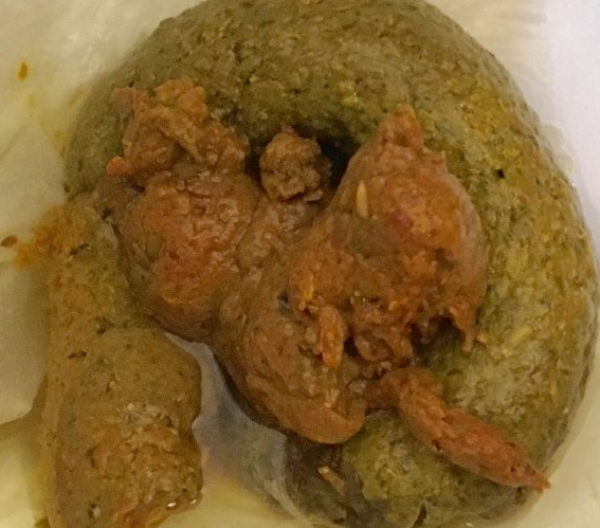

False Negative


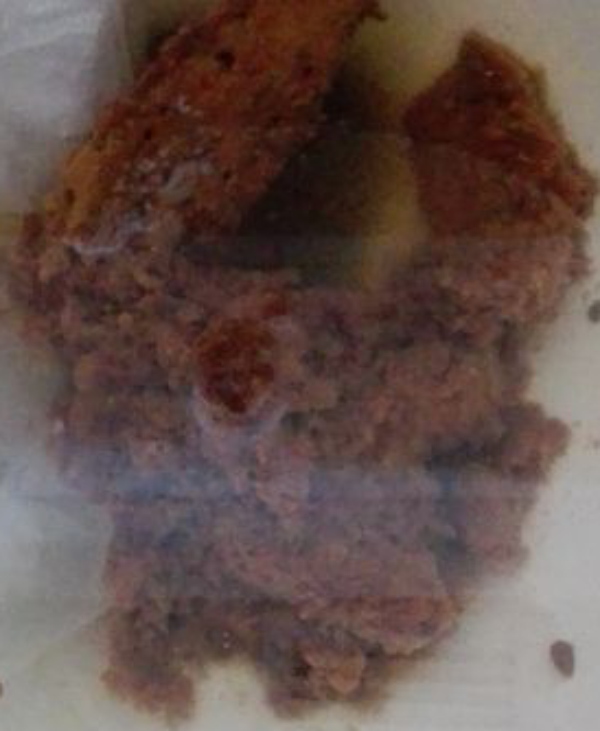

False Negative


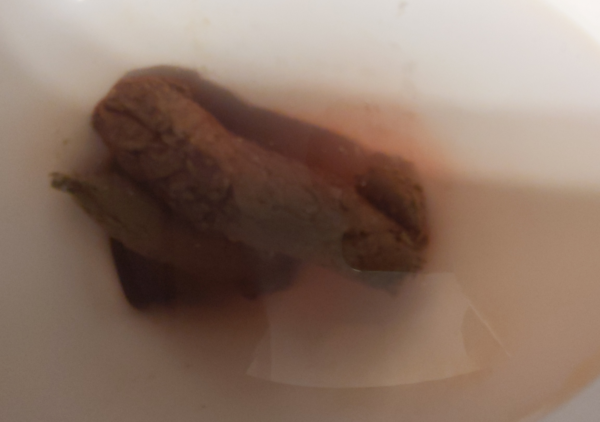

False Negative


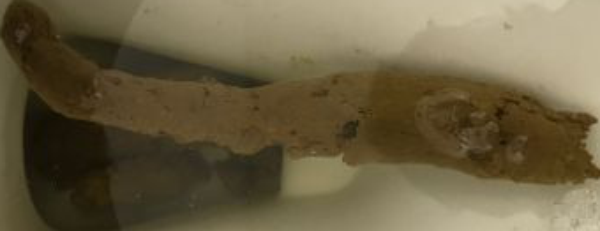

False Positive


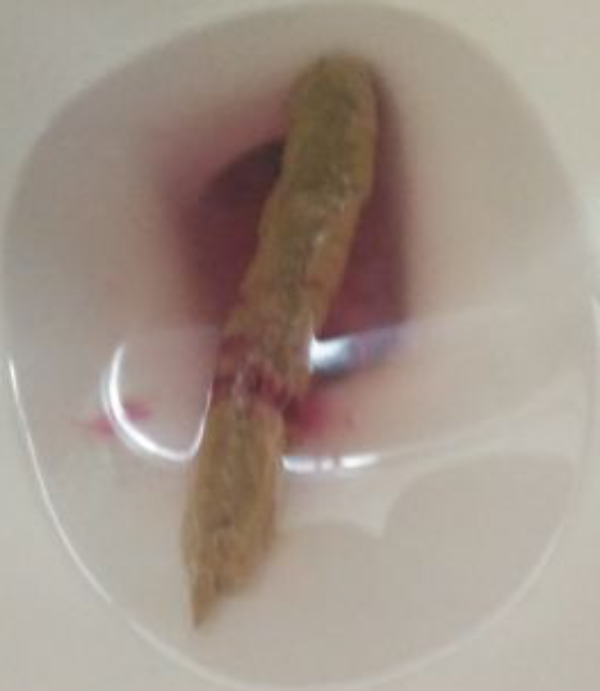

In [38]:
for index in range(0, y_test.size):
    correct_value = y_test[index]
    estimated_value = y_hat[index]
    if(correct_value != estimated_value):
        if(estimated_value == 0):
            print("False Negative")
        if(estimated_value == 1):
            print("False Positive")
        display(Image(filename=path + "/" + img_vec_names_for_csv[index]))
        